# Fraud detection - Creditcard data

## Tasks
- Explore and visualize dataset
- Prepare dataset for fitting
- Configure regression model
- Fit model
- Evaluate model



In [11]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

In [12]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=False)
df.head()
# df.describe()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,92503,63962.0,1.289870,0.472500,-0.076236,0.995108,0.183372,-0.773264,0.429646,-0.304756,...,-0.051970,-0.062547,-0.166920,-0.095488,0.822819,-0.329745,0.008197,0.013616,5.14,0
1,16536,27909.0,1.151802,0.125141,-0.021887,0.582930,-0.248111,-1.226404,0.515518,-0.342157,...,-0.342473,-1.176212,0.086105,0.384531,0.262804,0.130923,-0.076693,0.021486,74.95,0
2,86940,61463.0,-2.853985,1.640688,1.590070,0.788876,-0.475611,0.875708,-1.104920,1.982005,...,0.291083,0.572009,-0.335678,-0.294762,0.470275,-0.077076,-0.023390,-0.131983,1.00,0
3,235800,148540.0,1.942234,0.536031,-1.495605,3.503854,1.196665,0.551128,0.397318,0.058905,...,-0.013020,-0.066398,0.066282,0.086308,0.232199,0.008128,-0.075824,-0.070503,11.24,0
4,142368,84673.0,-1.206587,1.585600,1.199424,-0.288998,0.073483,-1.010017,1.161643,-0.583568,...,-0.593887,-0.863230,-0.052314,0.262547,-0.036899,0.015596,0.260916,-0.236715,9.98,0


In [13]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


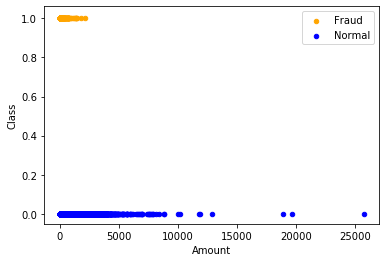

In [14]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
x = df
y = x.pop('Class')
print(x.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

(284807, 31)
(284807,)


In [17]:
# Scale
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [18]:
logistic = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
logistic.fit(X_train, y_train)
print(f'Score: {logistic.score(X_test, y_test):.4f}')

Score: 0.9992


In [19]:
y_predicted = np.array(logistic.predict(X_test))
print(f'Frauds/Samples: {y_predicted.sum()}/{len(X_test)} ({y_predicted.sum()*100/len(X_test):.2f} pct)')
print(classification_report(y_test, y_predicted))

Frauds/Samples: 140/113923 (0.12 pct)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113740
           1       0.82      0.63      0.71       183

    accuracy                           1.00    113923
   macro avg       0.91      0.81      0.86    113923
weighted avg       1.00      1.00      1.00    113923

